In [123]:
import os
import numpy as np
from osprey.actions.reader import reader_rebuilt, read_domain
import xarray as xr

In [124]:
domain = read_domain('FE00')

In [126]:
domain

<xarray.Dataset> Size: 52MB
Dimensions:        (y: 148, x: 180, z: 31)
Coordinates:
    time           float32 4B 0.0
Dimensions without coordinates: y, x, z
Data variables: (12/50)
    nav_lon        (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    nav_lat        (y, x) float32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    nav_lev        (z) float32 124B dask.array<chunksize=(31,), meta=np.ndarray>
    jpiglo         int32 4B ...
    jpjglo         int32 4B ...
    jpkglo         int32 4B ...
    ...             ...
    mask_csglo     (y, x) int32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    mask_csemp     (y, x) int32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    mask_csrnf     (y, x) int32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    mask_csgrpglo  (y, x) int32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    mask_csgrpemp  (y, x) int32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
    mask_csgrprnf  (y, x) int32 107kB dask.array<chunksize=(148, 180), meta=np.ndarray>
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [180 148]
    DOMAIN_size_local:       [180 148]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [180 148]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    history:                 Mon Apr  8 16:32:54 2024: ncrename -d nav_lev,z ...
    NCO:                     netCDF Operators version 4.9.7 (Homepage = http:...

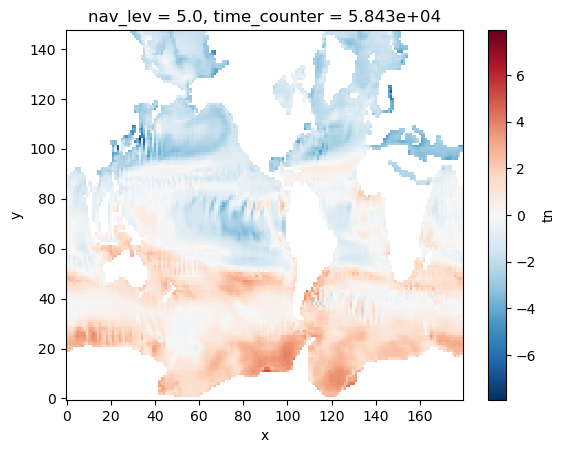

In [91]:
rdata = reader_rebuilt('FE00', 11, 11)
filename = os.path.join("/ec/res4/scratch/itas/ece4/FE00/restart/011", 'restart.nc')
fdata = xr.open_mfdataset(filename)
delta = rdata['tn']-fdata['tn']
delta.isel(nav_lev=0).plot()

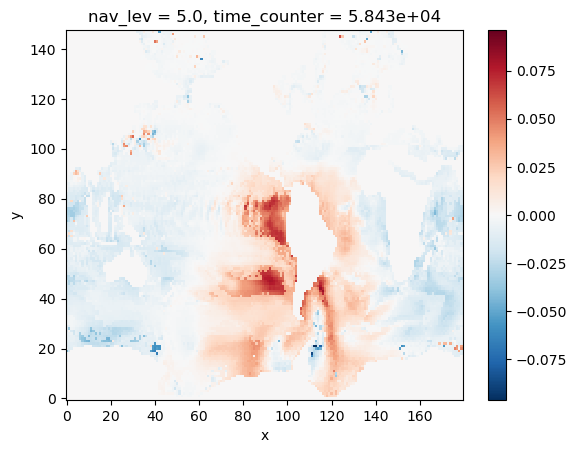

In [92]:
delta = rdata['tn']-rdata['tb']
delta.isel(nav_lev=0).plot()

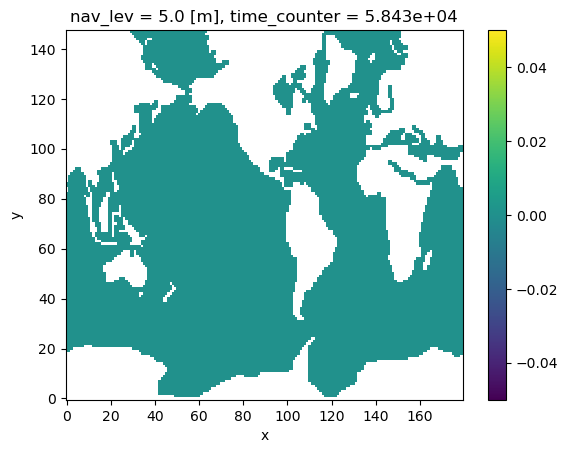

In [93]:
delta = fdata['tn']-fdata['tb']
delta.isel(nav_lev=0).plot()

In [133]:
field = domain['mask_opensea']*fdata['tn'].isel(time_counter=0)

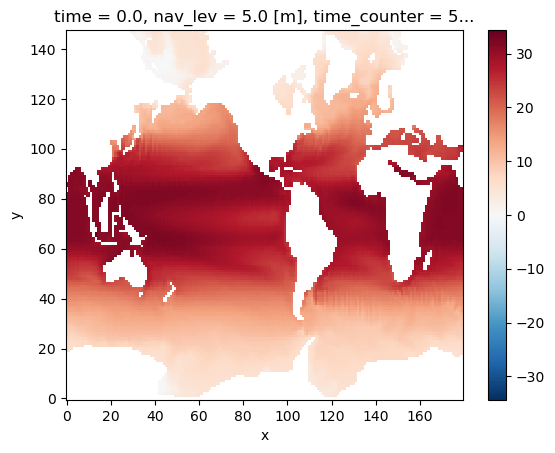

In [136]:
field.isel(nav_lev=0).plot()

In [137]:
# Check for NaN values using numpy
nan_mask = np.isnan(field)
# Check if there are any NaN values
has_nan = np.any(nan_mask)
# Print the results
if has_nan:
    print("The DataArray contains NaN values.")
else:
    print("The DataArray does not contain any NaN values.")
# Optional: If you want to know the locations of the NaN values
nan_indices = np.where(nan_mask)
print("Indices of NaN values:", nan_indices)

The DataArray contains NaN values.
Indices of NaN values: (array([  0,   0,   0, ..., 147, 147, 147]), array([  0,   0,   0, ..., 179, 179, 179]), array([ 0,  1,  2, ..., 28, 29, 30]))


In [138]:
nan_indices

(array([  0,   0,   0, ..., 147, 147, 147]),
 array([  0,   0,   0, ..., 179, 179, 179]),
 array([ 0,  1,  2, ..., 28, 29, 30]))

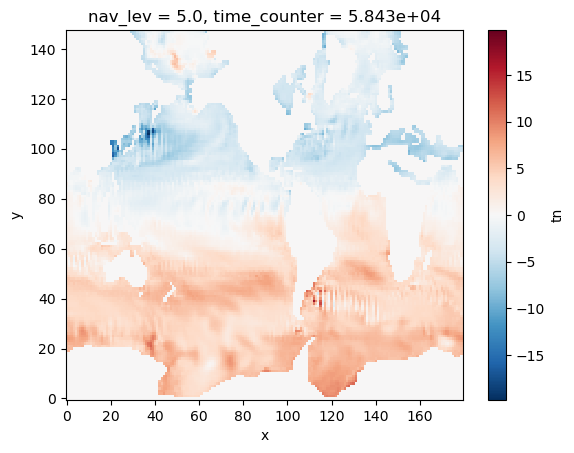

In [54]:
rdata = reader_rebuilt('FF00', 11, 11)
#rdata['tn'].isel(nav_lev=0,time_counter=0).plot()
filename = os.path.join("/ec/res4/scratch/itas/ece4/FF00/restart/011", 'restart.nc')
fdata = xr.open_mfdataset(filename)
delta = rdata['tn']-fdata['tn']
delta.isel(nav_lev=0).plot()

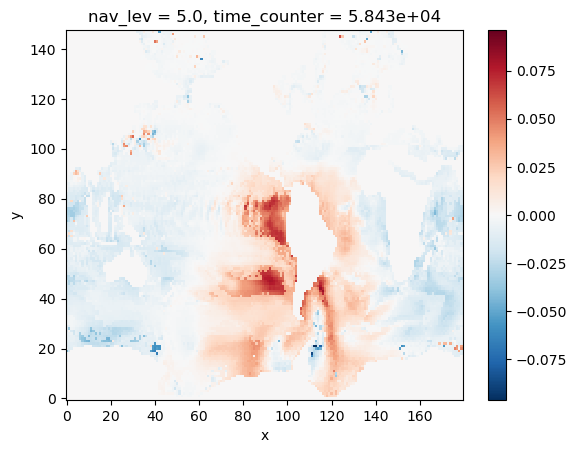

In [55]:
delta = rdata['tn']-rdata['tb']
delta.isel(nav_lev=0).plot()

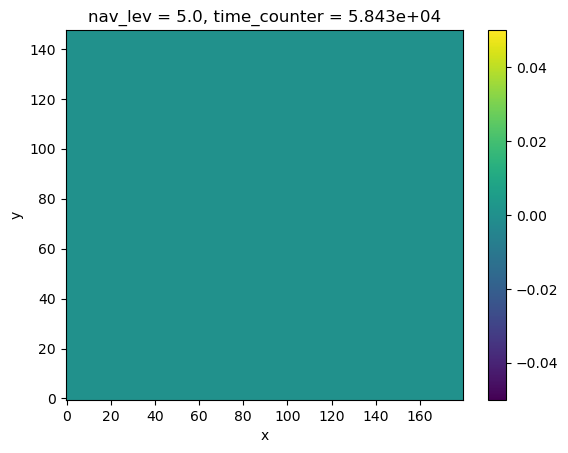

In [56]:
delta = fdata['tn']-fdata['tb']
delta.isel(nav_lev=0).plot()

In [57]:
# Check for NaN values using numpy
nan_mask = np.isnan(fdata['tn'])
# Check if there are any NaN values
has_nan = np.any(nan_mask)
# Print the results
if has_nan:
    print("The DataArray contains NaN values.")
else:
    print("The DataArray does not contain any NaN values.")
# Optional: If you want to know the locations of the NaN values
nan_indices = np.where(nan_mask)
print("Indices of NaN values:", nan_indices)

The DataArray does not contain any NaN values.
Indices of NaN values: (array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


In [72]:
nan_indices[1]

array([ 0,  0,  0, ..., 30, 30, 30])

In [75]:
fdata['tn'].isel(time_counter=0)

<xarray.DataArray 'tn' (nav_lev: 31, y: 148, x: 180)> Size: 7MB
dask.array<getitem, shape=(31, 148, 180), dtype=float64, chunksize=(31, 148, 180), chunktype=numpy.ndarray>
Coordinates:
  * nav_lev       (nav_lev) float32 124B 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
    time_counter  float32 4B 5.843e+04
Dimensions without coordinates: y, x

In [82]:
# Check for NaN values using numpy
nan_mask = np.isnan(fdata['tn'].isel(time_counter=0))
# Find the indices of NaN values
nan_indices = np.where(nan_mask)
# Collect the triplets (x, y, nav_lev) for NaN values
nan_triplets = [(fdata['x'].values[i[2]], fdata['y'].values[i[1]], fdata['nav_lev'].values[i[0]]) for i in nan_indices]
# Print the results
if nan_triplets:
    print("Triplets (x, y, nav_lev) with NaN values:")
    for triplet in nan_triplets:
        print(triplet)
else:
    print("The DataArray does not contain any NaN values for time_counter = 1.")

Triplets (x, y, nav_lev) with NaN values:
(0, 0, 4.999938)
(0, 0, 4.999938)
(2, 1, 4.999938)


In [84]:
# Check for NaN values using numpy
nan_mask = np.isnan(fdata['tn'].isel(time_counter=0))
# Find the indices of NaN values
nan_indices = np.where(nan_mask)
# Collect the triplets (i, j, k) for NaN values
# i corresponds to nav_lev, j to y, and k to x
nan_triplets = [(i, j, k) for i, j, k in nan_indices]
# Print the results
if nan_triplets:
    print("Triplets (i, j, k) with NaN values:")
    for triplet in nan_triplets:
        print(triplet)
else:
    print("The DataArray does not contain any NaN values for time_counter = 1.")

ValueError: too many values to unpack (expected 3)

In [86]:
# Check for NaN values
nan_mask = np.isnan(fdata['tn'].isel(time_counter=0))
# Find the indices of NaN values
nan_indices = np.nonzero(nan_mask)
# Collect the triplets (i, j, k) for NaN values
# i corresponds to nav_lev, j to y, and k to x
nan_triplets = list(zip(*nan_indices))
# Print the results
if nan_triplets:
    print("Triplets (i, j, k) with NaN values:")
    for triplet in nan_triplets:
        print(triplet)
else:
    print("The DataArray does not contain any NaN values for time_counter = 1.")

ValueError: dimensions ('nav_lev', 'y', 'x') must have the same length as the number of data dimensions, ndim=2